In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ver = 22
sub = ''

train = f'./train_v{ver}.csv'
test  = f'./test_v{ver}.csv'
result= f'./output_v{ver}.csv'
index = 'PassengerId'
valid = 'Transported'

In [ ]:
X = pd.read_csv(train, index_col='PassengerId')
y = X['Transported']
X = X.drop('Transported', axis=1)
X.columns

Index(['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Spends', 'Solo', 'DSide', 'Num_norm', 'no_Spend', 'AgeCat',
       'is_child', 'Side_0', 'Side_1', 'Side_2', 'Deck_0', 'Deck_1', 'Deck_2',
       'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6', 'Deck_7', 'Deck_8',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'HomePlanet_3',
       'RoomService_n', 'FoodCourt_n', 'ShoppingMall_n', 'Spa_n', 'VRDeck_n',
       'Spends_n'],
      dtype='object')

In [ ]:
test_X = pd.read_csv(test, index_col='PassengerId')
test_X.columns

Index(['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Spends', 'Solo', 'DSide', 'Num_norm', 'no_Spend', 'AgeCat',
       'is_child', 'Side_0', 'Side_1', 'Side_2', 'Deck_0', 'Deck_1', 'Deck_2',
       'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6', 'Deck_7', 'Deck_8',
       'HomePlanet_0', 'HomePlanet_1', 'HomePlanet_2', 'HomePlanet_3',
       'RoomService_n', 'FoodCourt_n', 'ShoppingMall_n', 'Spa_n', 'VRDeck_n',
       'Spends_n'],
      dtype='object')

In [ ]:
from lightgbm import LGBMClassifier
lbg_model = LGBMClassifier(force_row_wise=True, verbose=0, objective='binary', importance_type='gain', n_jobs=-1,
                            n_estimators=150, learning_rate=0.04)
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(iterations=1500, verbose=False, eval_metric='Accuracy')

In [ ]:
lbg_model.fit(X, y)
#cat_model.fit(X, y)

LGBMClassifier(force_row_wise=True, importance_type='gain', learning_rate=0.04,
               n_estimators=150, objective='binary', verbose=0)

In [ ]:
from catboost import CatBoostClassifier
from PythonML.help_learn import train_and_test
train_data = pd.read_csv(train)
acc_preds = []
for iter in [3000, 1500, 500, 2500]:
    model = CatBoostClassifier(iterations=iter, verbose=False, eval_metric='Accuracy')
    #print('iter', '\t'*2, train_and_test(train_data, model))
    model.fit(X, y)
    acc_preds.append(model.predict(test_X))
acc_preds

[array([1., 0., 1., ..., 1., 1., 1.]),
 array([1., 0., 1., ..., 1., 1., 1.]),
 array([1., 0., 1., ..., 1., 1., 1.]),
 array([1., 0., 1., ..., 1., 1., 1.])]

In [ ]:
preds_res = (acc_preds[0] + (acc_preds[1]*1.2) + acc_preds[2] + (acc_preds[3]*0.9)) / 4
for pred in preds_res:
    if pred < 1 and pred > 0:
        print(pred)

0.25
0.725
0.475
0.775
0.725
0.775
0.25
0.225
0.55
0.8
0.3
0.25
0.55
0.25
0.3
0.8
0.55
0.3
0.3
0.725
0.55
0.775
0.775
0.225
0.55
0.25
0.25
0.775
0.25
0.25
0.25
0.775
0.25
0.25
0.775
0.55
0.475
0.25
0.8
0.8
0.25
0.55
0.775
0.25
0.25
0.775
0.775
0.8
0.775
0.8
0.225
0.225
0.25
0.775
0.775
0.25
0.475
0.5
0.775
0.55
0.3
0.475
0.775
0.8
0.25
0.25
0.25
0.25
0.475
0.25
0.25
0.25
0.25
0.25
0.725
0.775
0.25
0.25
0.25
0.475
0.775
0.5
0.725
0.775
0.25
0.5


In [ ]:
preds = preds_res
for i, pred in enumerate(preds_res):
    preds[i] = 1 if pred > 0.5 else 0
preds

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
# iter 	500 	 [0.8098509390837723, 0.7981671672926427] # 0.81131
# iter 	1000	 [0.8114611282255126, 0.8004640813351898] # 0.81061
# iter 	1350	 [0.8124952797376528, 0.8022056574166317] # 0.81061
# iter 	1500	 [0.810427307959853, 0.7996823692943554]  # 0.81155
# iter 	1650	 [0.8127274835204875, 0.8021056358164286] # 
# iter 	2000	 [0.8116920070224255, 0.8001966705245855] # 
# iter 	2500	 [0.8113451919573355, 0.8002003764030619] # 0.81084
# iter 	3000	 [0.8116913445294643, 0.8005278412826787] # 0.81131
# iter 	3500	 [0.8115767332472091, 0.8006909690545124] #

In [ ]:
preds = lbg_model.predict(test_X).astype('bool')
preds

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
preds.astype('int').sum() / len(preds)

0.530745849894786

In [ ]:
output = pd.DataFrame({'PassengerId': test_X.index, 'Transported': preds.astype('bool')})

In [ ]:
output.to_csv(f'./output_v{ver}{sub}.csv', index=False)

In [ ]:
for i, name in enumerate(cat_model.feature_names_):
    print(name, '\t'*3, cat_model.feature_importances_[i])

CryoSleep 			 3.754236467011044
Age 			 5.86038489388787
RoomService 			 2.9273418389881862
FoodCourt 			 4.763107809448862
ShoppingMall 			 2.6048135795497
Spa 			 4.893747561422443
VRDeck 			 4.877100780024582
Spends 			 6.654569416077572
Solo 			 0.2947209919551888
no_Spend 			 3.5082442030379166
AgeCat 			 0.6540989188126213
DSide 			 6.519270156728305
Side_0 			 1.3626991835004585
Side_1 			 2.154629745143569
Side_2 			 0.11712634652071716
Deck_0 			 0.2713325643744
Deck_1 			 0.12591303110576216
Deck_2 			 2.054013257084263
Deck_3 			 0.10672674331042202
Deck_4 			 4.206984491542643
Deck_5 			 1.8240562244208867
Deck_6 			 1.0161140029526978
Deck_7 			 0.00012547970944078838
Deck_8 			 0.07457971377076612
HomePlanet_0 			 4.831795258561669
HomePlanet_1 			 3.191865657341064
HomePlanet_2 			 4.10398827943705
HomePlanet_3 			 0.2769065001475941
RoomService_n 			 3.214893413790045
FoodCourt_n 			 4.070203766610461
ShoppingMall_n 			 2.532483272014912
Spa_n 			 5.319742227851535
VRDe

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

In [ ]:
lbg_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid),(X_train, y_train)])

[1]	training's binary_logloss: 0.67465	valid_0's binary_logloss: 0.675479
[2]	training's binary_logloss: 0.657615	valid_0's binary_logloss: 0.659294
[3]	training's binary_logloss: 0.641786	valid_0's binary_logloss: 0.644258
[4]	training's binary_logloss: 0.627157	valid_0's binary_logloss: 0.630216
[5]	training's binary_logloss: 0.613679	valid_0's binary_logloss: 0.617309
[6]	training's binary_logloss: 0.600971	valid_0's binary_logloss: 0.605246
[7]	training's binary_logloss: 0.589061	valid_0's binary_logloss: 0.594021
[8]	training's binary_logloss: 0.577876	valid_0's binary_logloss: 0.583642
[9]	training's binary_logloss: 0.56716	valid_0's binary_logloss: 0.57362
[10]	training's binary_logloss: 0.557321	valid_0's binary_logloss: 0.564291
[11]	training's binary_logloss: 0.548145	valid_0's binary_logloss: 0.555707
[12]	training's binary_logloss: 0.539403	valid_0's binary_logloss: 0.547664
[13]	training's binary_logloss: 0.531145	valid_0's binary_logloss: 0.539942
[14]	training's binary_l

LGBMClassifier(force_row_wise=True, importance_type='gain', learning_rate=0.04,
               n_estimators=150, objective='binary', verbose=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

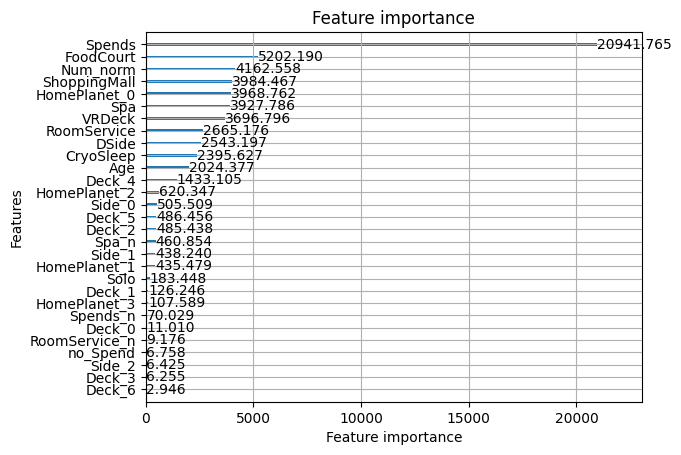

In [ ]:
from lightgbm import plot_importance
plot_importance(lbg_model)

In [1]:
from lightgbm import plot_metric # 5
plot_metric(lbg_model)

NameError: ignored

<AxesSubplot:>

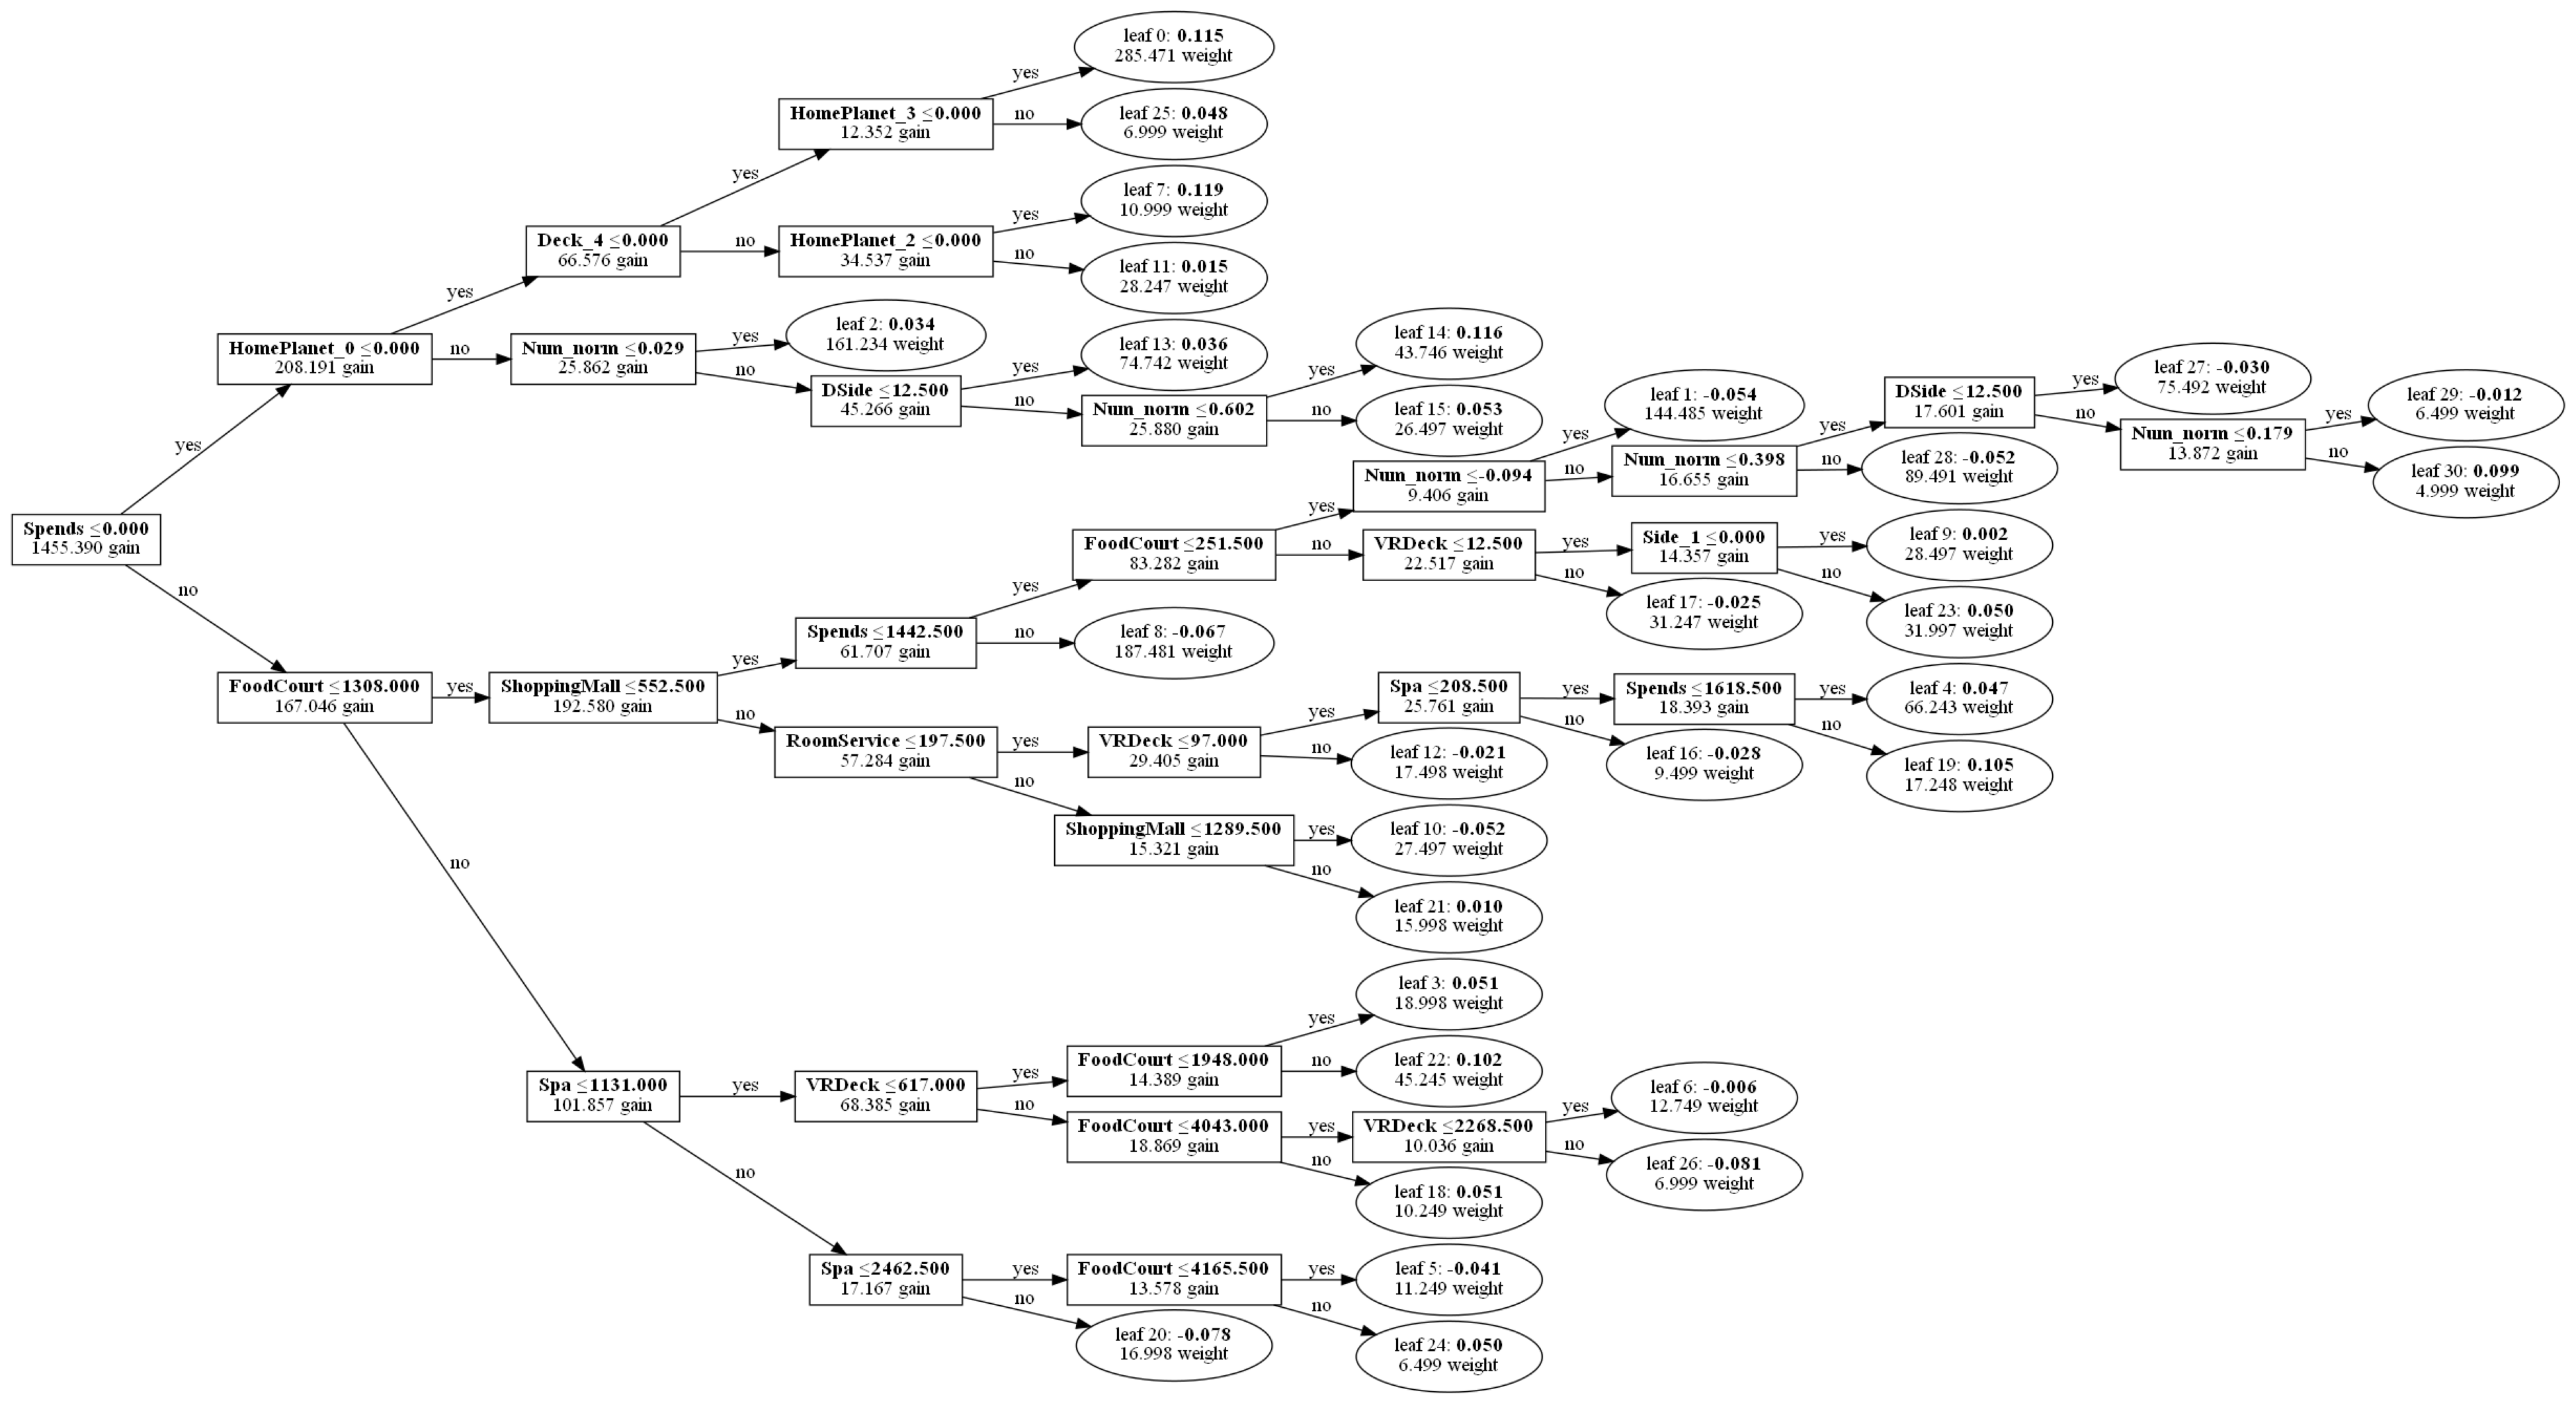

In [ ]:
from lightgbm import plot_tree # 5
plot_tree(lbg_model, figsize=(50, 50), show_info=['split_gain', 'leaf_weight'])

In [ ]:
from PythonML.help_learn import train_and_valid
from lightgbm import LGBMClassifier
lbg_model = LGBMClassifier(force_row_wise=True, verbose=0, objective='binary', importance_type='gain', n_jobs=-1,
                            n_estimators=150, learning_rate=0.05)
res = train_and_valid(pd.read_csv(train), lbg_model, 5)

In [ ]:
# full:    [0.794650189356189, 0.7909574955223582]
# no log:  [0.7968340974021659, 0.7917841577901835]
# no num:  [0.8062779881735433, 0.7920564193601694] 0.80804
# no both: [0.8058168892432396, 0.791941483479042]  0.80430
# norm:    [0.8090412597169623, 0.7992415995689235]
# no norm: [0.8090412597169623, 0.7992415995689235]
# full CCC: [0.8119041924124641, 0.8011854079952893]
# nums only: [0.8111015879343565, 0.8033796309440359]
# num_norm:  [0.7826928443292804, 0.78652379475532]
# num_norm2: [0.7715281376652715, 0.7744961001440666]
# norm2 0.03:[0.7862600491661682, 0.784035101120721]

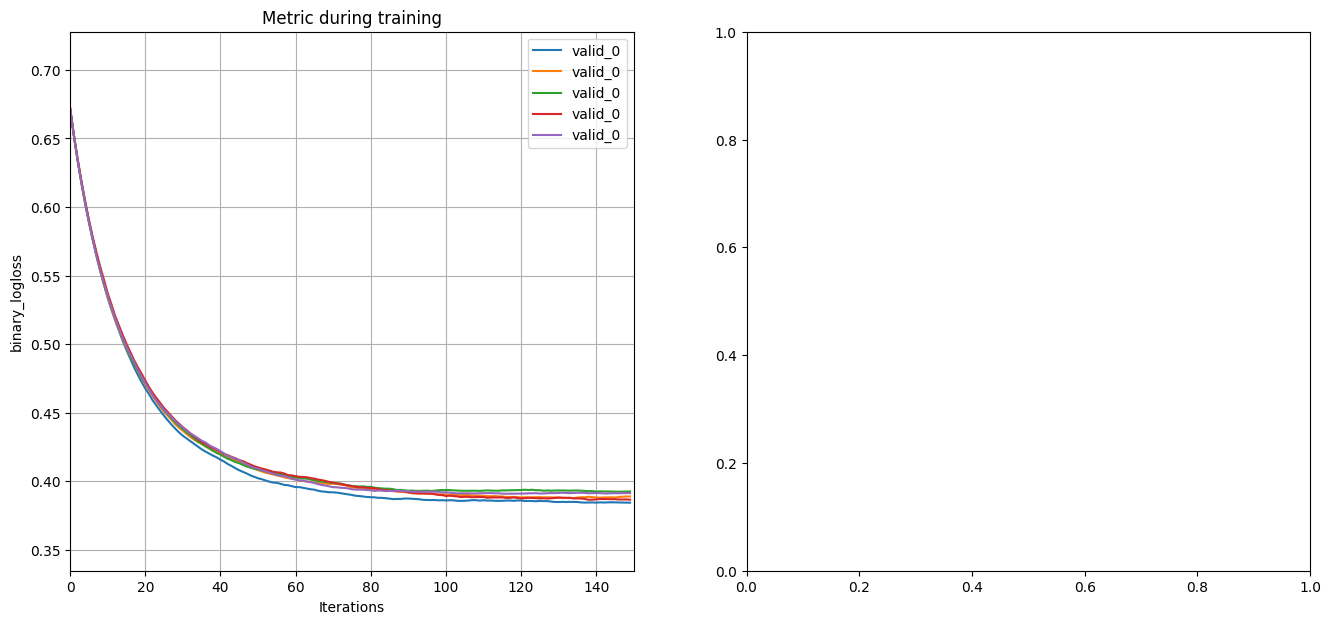

In [ ]:
from math import ceil
from lightgbm import plot_metric
count = 2#len(res['estimator'])
_, ax = plt.subplots(ceil(count/2), 2, figsize=(16, 7*ceil(count/2)))
j = 0
i = 0
for est in res['estimator']:
    plot_metric(est, ax=ax[i])
    #i = i + 1 if j == 1 else i
    #j = 0 if j == 1 else j + 1
plt.show()

In [ ]:
res['estimator'][0]

LGBMClassifier(force_row_wise=True, importance_type='gain', learning_rate=0.04,
               n_estimators=150, objective='binary', verbose=0)